# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Download Dataset in .zip format and Extract File

We download the dataset from the dicoding website in .zip format.

In [6]:
import wget
url = "https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip"
myfile = wget.download(url)

100% [......................................................................] 322873683 / 322873683

In [19]:
#importing an unzip library
import os, zipfile

#Extract/unzip the file from a Zipped Compressed Folder
local_zip = r'C:\Users\Acer\Documents\Belajar Data Science\Source Code Project\rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('\Source Code Project')
zip_ref.close()

# importing required modules 
#from zipfile import ZipFile 
  
# specifying the zip file name 
#file_name = "my_python_files.zip"
  
# opening the zip file in READ mode 
#with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    #zip.printdir() 
  
    # extracting all the files 
    #print('Extracting all the files now...') 
    #zip.extractall() 
    #print('Done!') 

In [20]:
#check directory
os.listdir('/Source Code Project/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [21]:
base_dir = '/Source Code Project/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [22]:
os.listdir('/Source Code Project/rockpaperscissors/rps-cv-images')

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

# Split Folder to Create a Train Dataset and a Validation Dataset

In [26]:
pip install split-folders

In [27]:
import splitfolders

#Splitting the folder into a training set and a validation set with ratio 60% and 40%
splitfolders.ratio("/Source Code Project/rockpaperscissors/rps-cv-images", 
                   output="/tmp/rockpaperscissors/hasil_split", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:37, 57.98 files/s]


In [29]:
base_dir = 'tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [31]:
# Create sub-folders of each our categories from the folder that containing the training and validation set.
rocks_dir = os.path.join(base_dir,'rock')
papers_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [32]:
os.listdir('/tmp/rockpaperscissors/hasil_split/val')

['paper', 'rock', 'scissors']

# Modelling

In [34]:
# Creating an image data generator that generates images for the training set and the validation set.

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [36]:
train_generator = train_datagen.flow_from_directory(
        directory = '/tmp/rockpaperscissors/hasil_split/train',
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        directory = '/tmp/rockpaperscissors/hasil_split/val', 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [38]:
# Make a model
#Neural Network Definition
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
____

In [41]:
#Compile the neural network
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

# Some methods to avoid overfitting
## ReduceLROnPlateau was used to reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=2)
## EarlyStopping was used to stop training when a monitored metric has stopped improving.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, mode='auto')

#fit the data with the model.fit
history = model.fit(
    train_generator,
    steps_per_epoch = 41, #n_samples / batch_size
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    callbacks=[reduce_lr, early_stop],
    verbose =2
)

Using TensorFlow backend.


Epoch 1/20
41/41 - 120s - loss: 0.9970 - acc: 0.4947 - val_loss: 0.7332 - val_acc: 0.6493
Epoch 2/20
41/41 - 89s - loss: 0.4748 - acc: 0.8323 - val_loss: 0.5426 - val_acc: 0.7384
Epoch 3/20
41/41 - 88s - loss: 0.3410 - acc: 0.8788 - val_loss: 0.2968 - val_acc: 0.9120
Epoch 4/20
41/41 - 89s - loss: 0.2223 - acc: 0.9299 - val_loss: 0.2133 - val_acc: 0.9225
Epoch 5/20
41/41 - 89s - loss: 0.1894 - acc: 0.9383 - val_loss: 0.1959 - val_acc: 0.9421
Epoch 6/20
41/41 - 100s - loss: 0.1716 - acc: 0.9383 - val_loss: 0.1556 - val_acc: 0.9583
Epoch 7/20
41/41 - 114s - loss: 0.1440 - acc: 0.9550 - val_loss: 0.1530 - val_acc: 0.9514
Epoch 8/20
41/41 - 104s - loss: 0.1352 - acc: 0.9573 - val_loss: 0.1237 - val_acc: 0.9630
Epoch 9/20
41/41 - 95s - loss: 0.1109 - acc: 0.9604 - val_loss: 0.1602 - val_acc: 0.9572
Epoch 10/20
41/41 - 94s - loss: 0.0865 - acc: 0.9748 - val_loss: 0.0994 - val_acc: 0.9688
Epoch 11/20
41/41 - 89s - loss: 0.0902 - acc: 0.9741 - val_loss: 0.1033 - val_acc: 0.9641
Epoch 12/20
41/

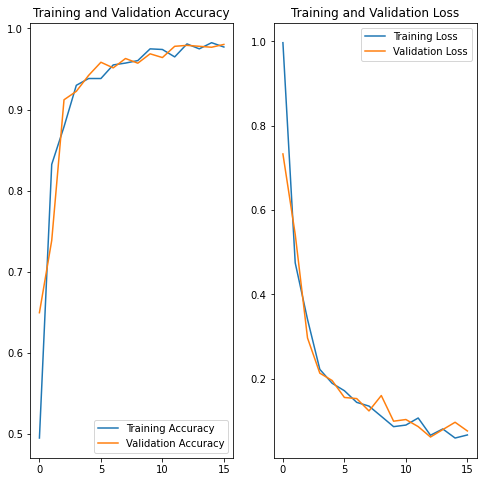

In [48]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(16)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

__As we could see that the "validation loss" value is end up to be roughly the same as the "loss" value, so that our model is a good fit model.__

# Reconigze Image

In [66]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import FileUpload
from IPython.display import display
%matplotlib inline

upload = FileUpload(multiple=True)
display(upload)

FileUpload(value={}, description='Upload', multiple=True)

this is scissors.jpeg
This is Scissors


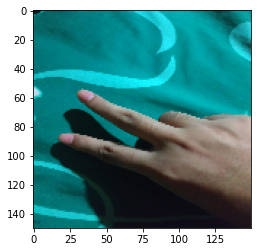

In [68]:
for name, file_info in upload.value.items():

  path = name
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(name)
  if classes[0][0] == 1:
    print('This is Paper')
  elif classes[0][1] == 1:
    print('This is Rock')
  else:
    print('This is Scissors')

*** __Some images could not be recognized as well. It because the training set only contains images with green colors' backgrounds. So, if we want to get this image recognition to work as well, we have to upload an image with a green color background.__